# Data Verification Function Example

## Dependency Package

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read file to DataFrame to show example
df=pd.read_csv('../../data/partial_data.csv')

## Functions for Numerical Variables

### num_var_info

In [3]:
def num_var_info(df):

    """    
    Show statistics for all the numerical columns in the DataFrame.

    Parameters
    ----------
    df : DataFrame
        The DataFrame contains numerical columns to show statistics. The statistics are: 
        count, mean, std, min, 25%, 50%, 75%, max, and range.


    Returns
    -------
    res : DataFrame
        The DataFrame with the numerical column name as title, and statistics as index.
    """
    
    res = df.describe()
    res.loc['range'] = res.loc['max',:]-res.loc['min',:]
    return res

In [4]:
num_var_info(df)

,entity_relevance,entity_sentiment,event_relevance,event_sentiment,story_group_count,story_group_sentiment_avg,story_group_sentiment_stdev,story_sentiment
count,248.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,87.023790,19.896787,67.862758,20.989960,15.887550,21.300803,17.960241,21.202410
std,23.865299,47.015484,37.285024,50.462768,39.638938,42.104932,19.748397,47.573881
min,8.900000,-93.800000,0.000000,-93.800000,1.000000,-91.700000,0.000000,-93.800000
25%,90.000000,-7.900000,35.384600,-9.400000,2.000000,0.000000,0.000000,-7.900000
50%,100.000000,25.000000,99.644700,29.900000,4.000000,31.600000,9.100000,29.900000
75%,100.000000,53.800000,100.000000,62.500000,10.000000,50.400000,37.300000,57.600000
max,100.000000,93.800000,100.000000,93.800000,381.000000,93.100000,81.700000,93.800000
range,91.100000,187.600000,100.000000,187.600000,380.000000,184.800000,81.700000,187.600000


### num_var_dist

In [5]:
def num_var_dist(df, mode='subplot'):

    """    
    Plot the value distributions of all numeric columns in the given DataFrame. 
    The plots can be shown one by one or as subplots of a figure.
    
    Parameters
    ----------
    df : DataFrame
        The DataFrame contains numerical columns to plot value distributions.    
    mode : string
        The mode that decides how these plots are shown. The set of possible mode is:
        'subplot' : show all the plots as subplots of a figure.
        'plot' : show all the plots one by one.
    """
    
    counter = 1
    if (mode=='subplot'):
        plt.figure(figsize=(10,10))
        fig_num = int(np.ceil(np.sqrt(len([column for column in df.columns if df[column].dtype!=object]))))
        for column in df.columns:
            plt.subplot(fig_num, fig_num, counter)
            if (df[column].dtype!=object):
                sns.histplot(df[column])
                counter += 1
    elif (mode=='plot'):
        for column in df.columns:
            if (df[column].dtype!=object):
                plt.figure(counter)
                sns.histplot(df[column])
                counter += 1
    else:
        raise ValueError("Wrong Parameter")

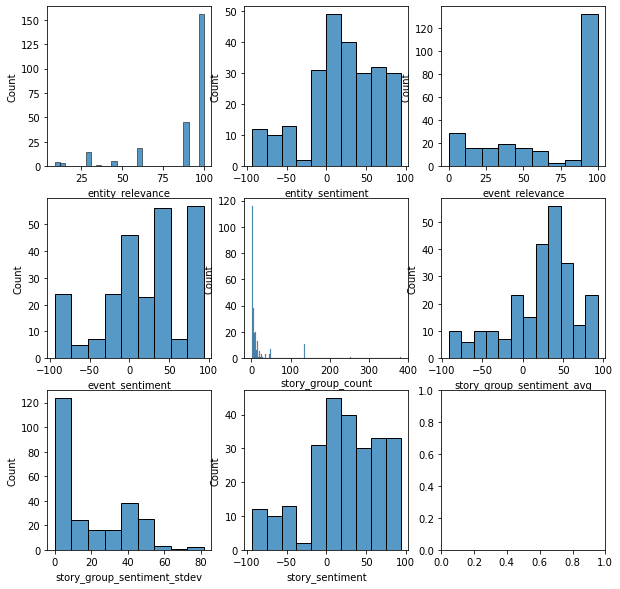

In [6]:
num_var_dist(df, mode='subplot')

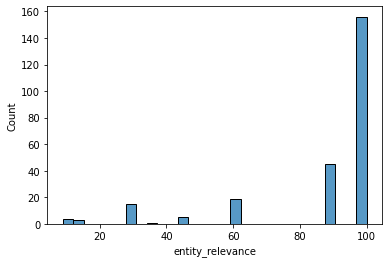

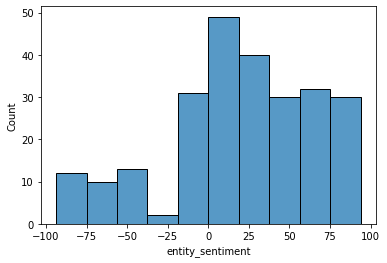

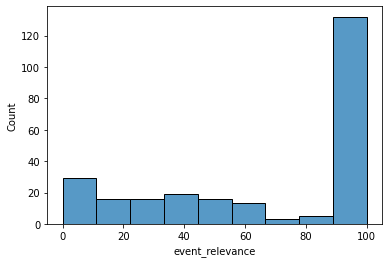

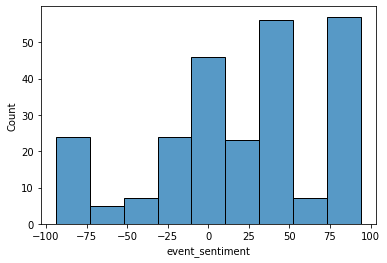

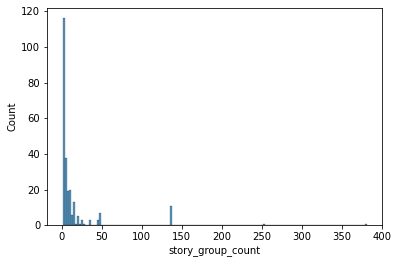

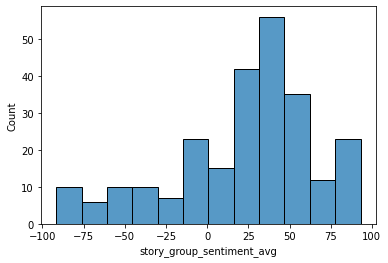

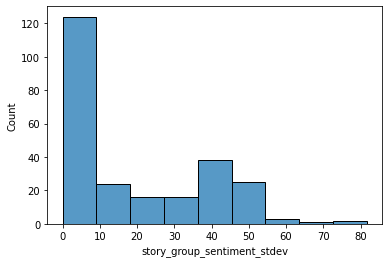

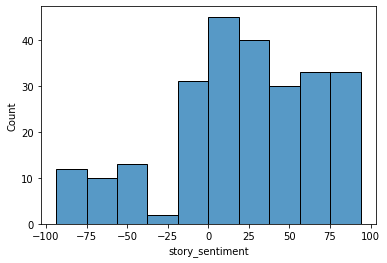

In [7]:
num_var_dist(df, mode='plot')

### show_outlier

In [8]:
def show_outlier(df, column, deviation=2):

    """    
    For a given numerical column in a DataFrame, show statistics of this column, 
    number of outliers and all the indexes and values of the outliers 
    that have deviation larger than the given deviation in this column.

    Parameters
    ----------
    df : DataFrame
        The DataFrame that contains the target numeric column.
    column : str
        The name of target numeric column.
    deviation : float
        The threshold of deviation that determines whether a value is outlier or not.

    Returns
    -------
     : Series
        The Series with the outliers' indexes as index and outliers' values as value.
    """

    print(f'Column name: {column}\n\tMax: {df[column].max()}\n\tMin: {df[column].min()}\n\tRange:{df[column].max()-df[column].min()}\n\tMean:{df[column].mean()}', end='\n\n')
    print(f'Number of Outliers: {len(df[column][abs(df[column] - np.mean(df[column]))>deviation*np.std(df[column])])}')
    print(f'Index\tValue', end='')
    return df[column][abs(df[column] - np.mean(df[column]))>deviation*np.std(df[column])]

In [9]:
show_outlier(df, "story_group_sentiment_avg", deviation=2.0)

Column name: story_group_sentiment_avg
	Max: 93.1
	Min: -91.7
	Range:184.8
	Mean:21.3008032128514

Number of Outliers: 16
Index	Value

0     -63.9
1     -63.9
2     -63.9
43    -75.0
115   -91.7
127   -66.1
128   -66.1
129   -81.3
130   -81.3
131   -81.3
132   -81.3
133   -81.3
134   -81.3
135   -81.3
136   -81.3
225   -78.6
Name: story_group_sentiment_avg, dtype: float64

## Functions for Categorical Variables

### cat_var_type_count

In [10]:
def cat_var_type_counts(df):

    """
    Given a DataFrame, for all the categorical columns, show how many categories are in each column.

    Parameters
    ----------
    df : DataFrame
        The DataFrame that contains categorical columns.
    
    Returns
    -------
     : DataFrame
        The DataFrame contains the categorical column names and the number of category types in each column.
    """

    col_num = len([column for column in df.columns if df[column].dtype==object])
    report = []
    counter = 0
    for column in df.columns:
        if (df[column].dtype==object):
            report.append([column, len(df[column].unique())])
    return pd.DataFrame(report, columns=['column_name', 'number_of_category_type'])

In [11]:
cat_var_type_counts(df)

,column_name,number_of_category_type
0,entity_composite_figi,67
1,entity_country,4
2,entity_exch_code,6
3,entity_exchange,5
4,entity_figi,67
5,entity_industry,45
6,entity_name,67
7,entity_region,2
8,entity_sector,13
9,entity_share_class_figi,67


### cat_var_vis

In [12]:
def cat_var_vis(df, mode='subplot', max_category_num=10, label_distance=1.5):

    """
    Plot the pie charts for categorical columns in the DataFrame to show the percentage of each category.

    Parameters
    ----------
    df : DataFrame
        The pandas DataFrame that contains categorical columns to plot pie chart.
    max_category_num : int
        The maximum number of categories a column have for the column to be plot.
        This parameter is to avoid to plot the column contains all different strings instead of categories.
    label_distance : float
        The distance between category labels.
    """

    counter = 1
    if mode=="subplot":
        plt.figure(figsize=(15,15))
        fig_num = int(np.ceil(np.sqrt(len([column for column in df.columns if df[column].dtype==object and len(df[column].unique()) < max_category_num]))))
        for column in df.columns:
            if (df[column].dtype==object) and len(df[column].unique()) < max_category_num:
                plt.subplot(fig_num, fig_num, counter)
                plt.pie(df[column].value_counts(), labels=df[column].value_counts().index, labeldistance=label_distance)
                plt.legend(bbox_to_anchor=(0.2,0.2))
                plt.title(column)
                counter+=1
    elif mode=="plot":
        for column in df.columns:
            if (df[column].dtype==object) and len(df[column].unique()) < max_category_num:
                plt.figure(counter)
                plt.pie(df[column].value_counts(), labels=df[column].value_counts().index, labeldistance=label_distance)
                plt.legend(bbox_to_anchor=(0.2,0.2))
                plt.title(column)
                counter+=1
    else:
        raise ValueError("Wrong Parameter")

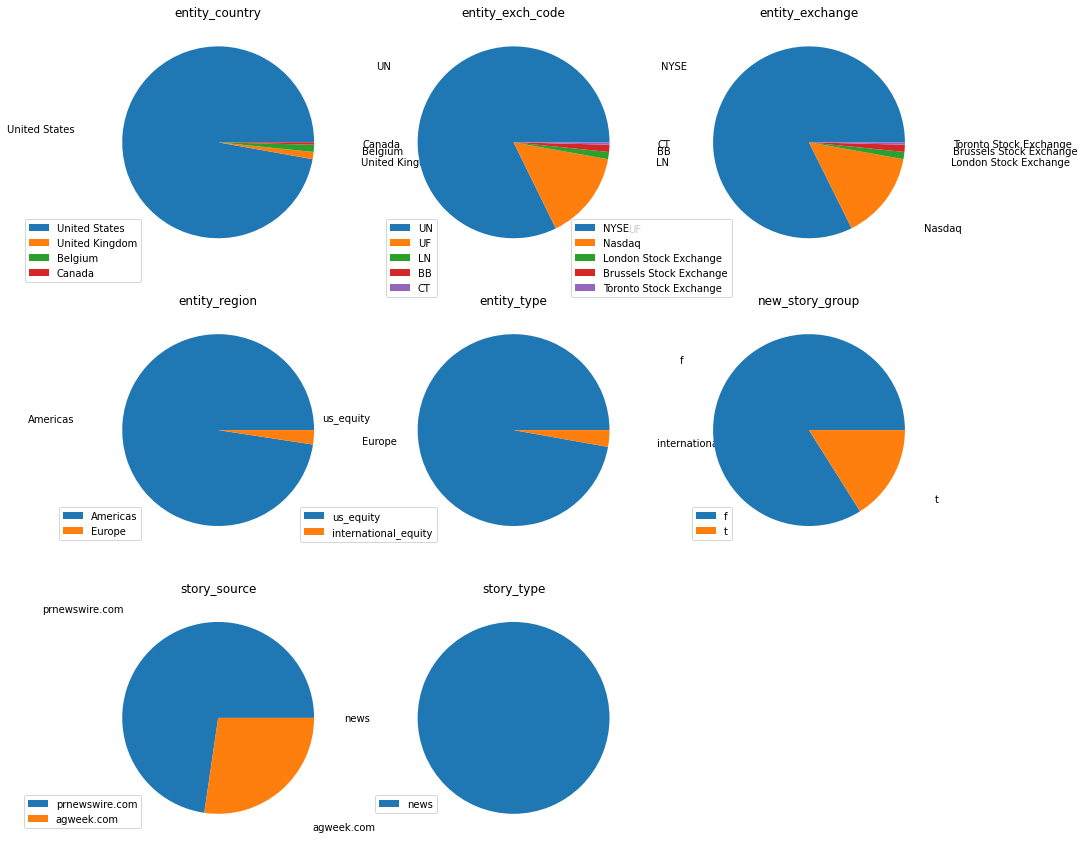

In [13]:
cat_var_vis(df, mode="subplot")

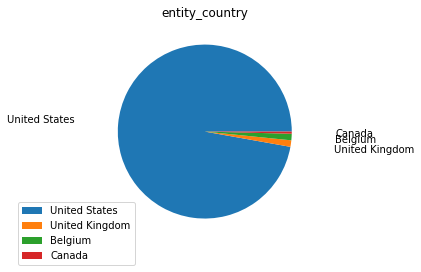

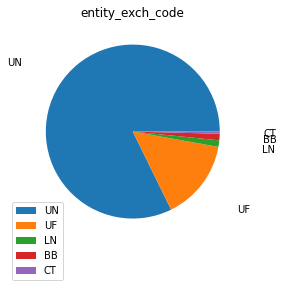

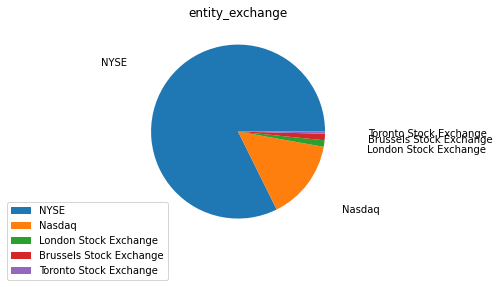

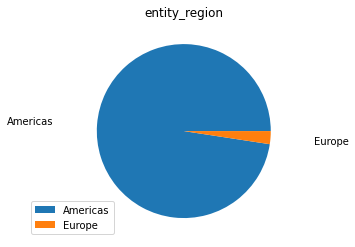

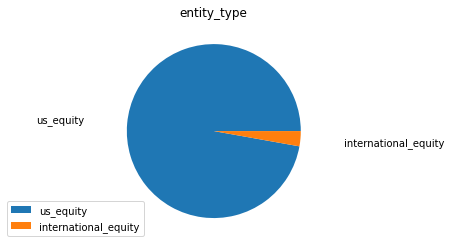

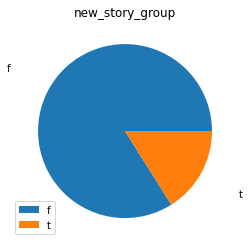

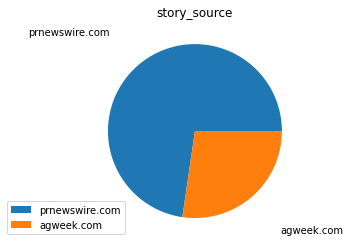

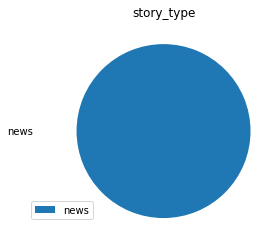

In [14]:
cat_var_vis(df, mode="plot")

### cat_counts_sort

In [15]:
def cat_counts_sort(df, column, row_index_start=0, row_index_end=10, orderby="frequency", ascending=True):
    """
    For a given categorical column in DataFrame, show its value counts 
    in frequency order or alphabetic order in the given index range.

    Parameters
    ----------
    df : DataFrame
        The DataFrame that contains the target categorical column.
    column : str
        The name of target categorical column.
    row_index_start : int
        The start row index of the value count series.
    row_index_end : int
        The end row index of the value count series.
    order_by : str, default 'frequency'
        Decides how value counts Series are ordered. The set of possible order_by value is:
        'frequency' : show all the plots as subplots of a figure.
        'alphabetic' : show all the plots one by one.
    ascending : bool, default True
        Decides whether the value counts Series is in ascending order or descending order.
    
    Returns
    -------
     : Series
        The Series with categories as index and category counts as values in the given index range
        sorted by the given order.
    """
    if (orderby=="frequency"):
        print("Sort By Frequency Order: ")
        return df[column].value_counts().sort_values(ascending=ascending)[row_index_start:row_index_end]
    elif (orderby=="alphabetic"):
        print("Sort By Alphabetic Order: ")
        return df[column].value_counts().sort_index(ascending=ascending)[row_index_start:row_index_end]
    else:
        raise ValueError("Wrong Parameter")

In [16]:
cat_counts_sort(df, "entity_industry", 0, 10, orderby="alphabetic", ascending=True)

Sort By Alphabetic Order: 


Agricultural Chemicals                  7
Auto Manufacturing                     14
Auto Parts:O.E.M.                       2
Beverages                               3
Beverages (Production/Distribution)     8
Broadcasting                            3
Building Materials                      3
Business Services                       3
Catalog/Specialty Distribution          8
Computer Manufacturing                 11
Name: entity_industry, dtype: int64